### AI-12 Quiz   

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

#### Parameters  

In [2]:
csv_in = 'ai-12-quiz.csv'

#### Read CSV file  

In [3]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(350, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c1      350 non-null    float64
 1   c2      350 non-null    float64
 2   c3      350 non-null    float64
 3   c4      350 non-null    float64
 4   type    350 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.8+ KB
None


,c1,c2,c3,c4,type
0,5.22,8.61,1.60,0.13,t1
1,3.80,8.05,1.70,0.06,t1
2,3.66,6.85,-1.59,0.28,t1
3,2.14,7.55,-0.38,-0.25,t1
4,3.99,8.57,1.16,-1.50,t1


In [4]:
df_X= df.loc[:, :'c4']
ser_y = df['type']

In [5]:
print(df_X.shape)
print(df_X.info())
display(df_X.head())
print(ser_y.shape)
print(ser_y.head())

(350, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c1      350 non-null    float64
 1   c2      350 non-null    float64
 2   c3      350 non-null    float64
 3   c4      350 non-null    float64
dtypes: float64(4)
memory usage: 11.1 KB
None


,c1,c2,c3,c4
0,5.22,8.61,1.60,0.13
1,3.80,8.05,1.70,0.06
2,3.66,6.85,-1.59,0.28
3,2.14,7.55,-0.38,-0.25
4,3.99,8.57,1.16,-1.50


(350,)
0    t1
1    t1
2    t1
3    t1
4    t1
Name: type, dtype: object


In [6]:
rfc=RandomForestClassifier(random_state=23)            

# Hyper paramet settings for grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth' : [2, 4, 6, None],
}

In [7]:
grid_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=29)
gen_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=31)

In [8]:
gs = GridSearchCV(rfc, param_grid , cv=grid_cv, scoring='accuracy')


In [9]:
%%time
nested_score = cross_val_score(gs, X=df_X, y=ser_y, cv=gen_cv,
                               scoring='accuracy')
print(nested_score)
print(nested_score.mean())

[0.93181818 0.96590909 0.95402299 0.91954023]
0.9428226227795193
Wall time: 32.2 s


In [10]:
%%time
gs.fit(df_X, ser_y)
gs_best = gs.best_estimator_

Wall time: 8.92 s


In [11]:
print(gs_best)

RandomForestClassifier(max_depth=6, random_state=23)


In [12]:
print(pd.Series(gs_best.feature_importances_, index=df_X.columns))

c1    0.303965
c2    0.480434
c3    0.161134
c4    0.054467
dtype: float64


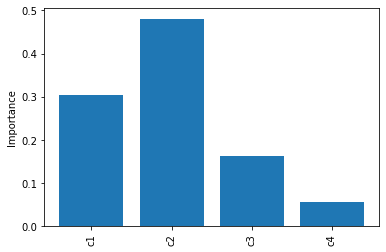

In [13]:
plt.bar(df_X.columns, gs_best.feature_importances_)
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()